# **Neural Network Training and Evaluation**

This notebook demonstrates the training and evaluation of a neural network classifier for stellar classification using FliPer values and other features.

---

## **Code Breakdown**

### **Importing Libraries and Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add 'src' and 'data' folders to the system path
sys.path.append(os.path.join(parent_dir, 'src'))

from neural_network_model import preprocess_data, train_and_evaluate_nn

### **Loading Preprocessed Data**

In [2]:
# Load processed synthetic data
data = pd.read_csv("../data/processed/synthetic_fliper_data.csv")

### **Data Preprocessing**
- `preprocess_data(data)`: Prepares the data for training, such as normalizing feature values
- one hot encoding
- `train_test_split`: Splits the data into training and testing sets with an 80-20 ratio.


In [3]:
# Preprocess data
X, y = preprocess_data(data)

In [4]:
from sklearn.preprocessing import OneHotEncoder
# Convert to NumPy array
labels_array = np.array(y)

# Number of classes
num_classes = len(np.unique(labels_array))

# One-hot encoding
y = np.eye(num_classes)[labels_array]

print(y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Training Neural Network**
- `train_and_evaluate_nn`: A function from neural_network_model.py that builds, trains, and evaluates the neural network.
- Returns the trained model after training.

In [6]:
# Train neural network
model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

c:\Users\user\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5831 - loss: 1.7634 - val_accuracy: 0.7618 - val_loss: 0.7605
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.6195 - val_accuracy: 0.8954 - val_loss: 0.4247
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.3774 - val_accuracy: 0.9173 - val_loss: 0.2871
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.2585 - val_accuracy: 0.9318 - val_loss: 0.2291
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9418 - loss: 0.2160 - val_accuracy: 0.9451 - val_loss: 0.1998
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9449 - loss: 0.1877 - val_accuracy: 0.9480 - val_loss: 0.1875
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9430 - loss: 0.2057 - val_accuracy: 0.9520 - val_loss: 0.1763
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9478 - loss: 0.1783 - val_accuracy: 0.9532 - v

### **Model Evaluation**

In [7]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
# Convert back to numeric labels
y_test = np.argmax(y_test, axis=1)

print(y_test)

[7 5 4 ... 6 6 5]


In [12]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       0.99      0.99      0.99       244
           2       0.31      0.21      0.25        19
           3       0.92      0.89      0.90       310
           4       0.99      0.99      0.99       190
           5       0.98      0.98      0.98       129
           6       1.00      0.99      1.00       387
           7       0.96      0.99      0.97       732
           8       0.92      0.85      0.88        52
           9       1.00      1.00      1.00        34

    accuracy                           0.96      2163
   macro avg       0.90      0.89      0.89      2163
weighted avg       0.96      0.96      0.96      2163



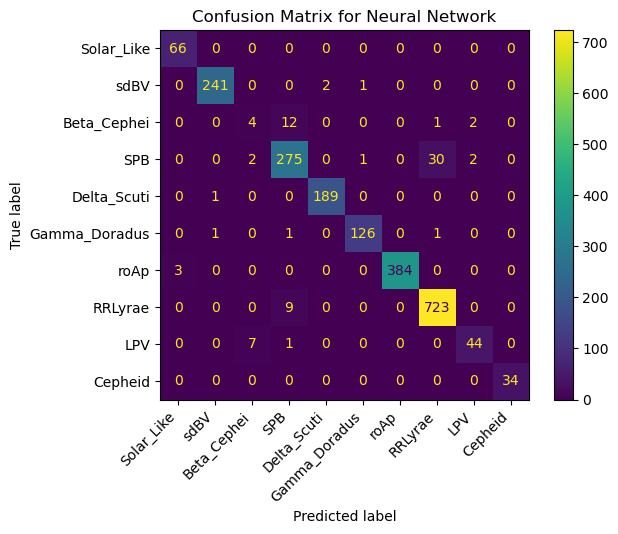

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data["Star_Type"].unique())
disp.plot(cmap="viridis")

# Customize x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate labels 45 degrees and align them to the right
plt.title("Confusion Matrix for Neural Network")
plt.show()

In [18]:
# Save the trained model in the native Keras format
model.save("../models/neural_network_classifier.keras")
print("Neural Network model saved as 'neural_network_classifier.keras'")

Neural Network model saved as 'neural_network_classifier.keras'
